Exercise 4: Least square fit to data

In [1]:
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np

In [2]:
# data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='d')
dx =  np.array([0.1,0.1,0.5,0.1,0.5,0.1,0.5,0.1,0.5,0.1], dtype='d')
y = np.array([1.1 ,2.3 ,2.7 ,3.2 ,3.1 ,2.4 ,1.7 ,1.5 ,1.5  ,1.7 ], dtype='d')
dy = np.array([0.15,0.22,0.29,0.39,0.31,0.21,0.13,0.15,0.19,0.13], dtype='d')

In [3]:
# define fit function 
def pol3(a0, a1, a2, a3):
    return a0 + x*a1 + a2*x**2 + a3*x**3

In [4]:
# least-squares function = sum of data residuals squared
def LSQ(a0, a1, a2, a3):
    return np.sum((y - pol3(a0, a1, a2, a3)) ** 2 / dy ** 2)

In [5]:
# import Minuit object
from iminuit import Minuit

In [6]:
# create instance of Minuit and use LSQ function to minimize
LSQ.errordef = Minuit.LEAST_SQUARES
m = Minuit(LSQ,a0=-1.3, a1=2.6 ,a2=-0.24 ,a3=0.005)
# run migrad 
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.719                      │              Nfcn = 103              │
│ EDM = 4.33e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -0.98   │   0.34    │            │            │         │         │       │
│ 1 │ a1   │   2.52    │   0.30    │            │            │         │         │       │
│ 2 │ a2   │   -0.48   │   0.06    │            │            │         │         │       │
│ 3 │ a3   │  0.0259   │  0.0035   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │     0.119    -0.096    0.0183 -0.000997 │
│ a1 │    -0.096    0.0893   -0.0178  0.000996 │
│ a2 │    0.0183   -0.0178   0.00366 -0.000208 │
│ a3 │ -0.000997  0.000996 -0.000208   1.2e-05 │
└────┴─────────────────────────────────────────┘

In [7]:
# get function value at the minimum, which is per definition a chi2
# obtain chi2 / degree of freedom (dof)
chi2 = m.fval / (len(y) - len(m.values))
print ("Chi2/ndof =" , chi2)

Chi2/ndof = 0.6198527004952333


In [8]:
# run covariance  
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.719                      │              Nfcn = 128              │
│ EDM = 1.06e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -0.98   │   0.34    │            │            │         │         │       │
│ 1 │ a1   │   2.52    │   0.30    │            │            │         │         │       │
│ 2 │ a2   │   -0.48   │   0.06    │            │            │         │         │       │
│ 3 │ a3   │  0.0259   │  0.0035   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │     0.119   -0.0961    0.0183 -0.000999 │
│ a1 │   -0.0961    0.0895   -0.0179  0.000997 │
│ a2 │    0.0183   -0.0179   0.00366 -0.000208 │
│ a3 │ -0.000999  0.000997 -0.000208   1.2e-05 │
└────┴─────────────────────────────────────────┘

In [9]:
#get covariance matrix
m.covariance

┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │     0.119   -0.0961    0.0183 -0.000999 │
│ a1 │   -0.0961    0.0895   -0.0179  0.000997 │
│ a2 │    0.0183   -0.0179   0.00366 -0.000208 │
│ a3 │ -0.000999  0.000997 -0.000208   1.2e-05 │
└────┴─────────────────────────────────────────┘

In [10]:
#get correlation matrix in numpy array
cov = m.covariance
print (cov)

┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │     0.119   -0.0961    0.0183 -0.000999 │
│ a1 │   -0.0961    0.0895   -0.0179  0.000997 │
│ a2 │    0.0183   -0.0179   0.00366 -0.000208 │
│ a3 │ -0.000999  0.000997 -0.000208   1.2e-05 │
└────┴─────────────────────────────────────────┘


In [11]:
# run minos error analysis
# The Minos algorithm uses the profile likelihood method to compute
# (generally asymmetric) confidence intervals.
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.719                      │              Nfcn = 300              │
│ EDM = 1.06e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -0.98   │   0.35    │   -0.34    │    0.34    │         │         │       │
│ 1 │ a1   │   2.52    │   0.30    │   -0.30    │    0.30    │         │         │       │
│ 2 │ a2   │   -0.48   │   0.06    │   -0.06    │    0.06    │         │         │       │
│ 3 │ a3   │  0.0259   │  0.0035   │  -0.0035   │   0.0035   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          a0           │          a1           │          a2           │          a3           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │   -0.3    │    0.3    │   -0.06   │   0.06    │  -0.0035  │  0.0035   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────┐
│    │        a0        a1        a2        a3 │
├────┼─────────────────────────────────────────┤
│ a0 │     0.119   -0.0961    0.0183 -0.000999 │
│ a1 │   -0.0961    0.0895   -0.0179  0.000997 │
│ a2 │    0.0183   -0.0179   0.00366 -0.000208 │
│ a3 │ -0.000999  0.000997 -0.000208   1.2e-05 │
└────┴─────────────────────────────────────────┘

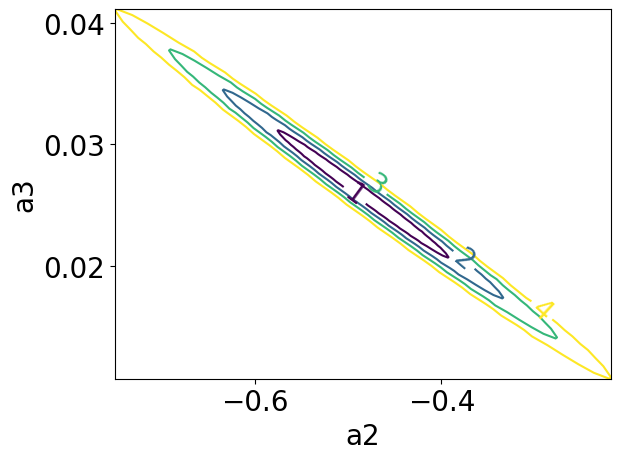

In [12]:
# Get a 2D contour of the function around the minimum for 2 parameters
# and draw a 2 D contours up to 4 sigma of a1 and a2 
#m.draw_profile("a1")
m.draw_mncontour("a2", "a3",  cl=[1, 2, 3, 4])

In [13]:
print(m.values,m.errors)
a0_fit = m.values["a0"]
a1_fit = m.values["a1"]
a2_fit = m.values["a2"]
a3_fit = m.values["a3"]

<ValueView a0=-0.9807363849012718 a1=2.520457666696189 a2=-0.484056651556402 a3=0.02590585286811066> <ErrorView a0=0.3452141046758837 a1=0.2991369099052406 a2=0.06052732413714454 a3=0.003463469704203838>


In [14]:
# display fitted function 
x_plot = np.linspace( 0.1, 10.1 , 200 )
y_fit = a0_fit + a1_fit * x_plot + a2_fit * x_plot**2 +  a3_fit * x_plot**3

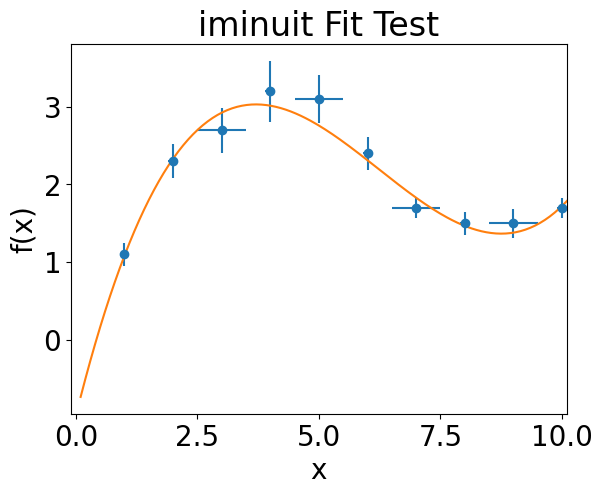

In [15]:
# plot data 
plt.figure()
plt.errorbar(x, y, dy , dx, fmt="o")
plt.plot(x_plot,y_fit )
plt.title("iminuit Fit Test")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-0.1, 10.1)

# show the plot
plt.show()